# 数据处理模板

## 预设

### 导入库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from utils import *

### 全局参数

In [2]:
DictionaryFilePath = 'data/西安城市形象编码词表.pkl'
DataFilePath = 'data/西安城市形象数据_关键词_议题分类.pkl'

### 全局设置

In [3]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zackyule/.pyenv/versions/3.11.0/envs/NLP_basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


## 函数工具

## 数据读取

In [18]:
dictionary_comparison_table = pd.read_pickle(DictionaryFilePath)
data = pd.read_pickle(DataFilePath)
# data = data.sample(10).reset_index(drop=True)
# data.shape

In [66]:
d = data[dictionary_comparison_table.columns.drop(['积极判断框架','消极判断框架','事件框架','细节框架'])].sample(20)

In [4]:
DataFilePath = 'data/西安城市形象数据_关键词_关键词选取.pkl'
DictionaryFilePath = 'data/西安城市形象编码词表.pkl'
dictionary_comparison_table = pd.read_pickle(DictionaryFilePath)
data = pd.read_pickle(DataFilePath)

In [6]:
dictionary_comparison_table_topic = dictionary_comparison_table.drop(['积极判断框架','消极判断框架','事件框架','细节框架'], axis=1)
dictionary_comparison_table_narration = dictionary_comparison_table[['积极判断框架','消极判断框架','事件框架','细节框架']]

In [7]:
data = get_single_classification(data, '议题关键词', dictionary_comparison_table_topic, inplace=True)

In [44]:
dictionary_comparison_table_narration

,积极判断框架,消极判断框架,事件框架,细节框架
0,能量,差距,宝鸡,陪伴
1,全力,挑战,布局,措施
2,中华,应急,部门,调整
3,专家,暴雨,地区,报告
4,祖国,大风,地域,负责人
...,...,...,...,...
89,文化,NaN,工程,软骨
90,人文,NaN,经济,鼻子
91,文化底蕴,NaN,企业,口罩
92,信任,NaN,合作,磨骨


## 数据分析

### 框架分布及变化趋势

#### 框架分布统计描述

In [19]:
# 总数统计
dictionary_statistics_df = pd.DataFrame()
dictionary_statistics_df = get_class_sum(
    dictionary_comparison_table.columns, dictionary_statistics_df, data)
for source in ['豆瓣', '微博', '知乎']:
        dictionary_statistics_df = get_class_sum(
            dictionary_comparison_table.columns,
            dictionary_statistics_df,
            data,
            field='平台',
            filter_content=source)

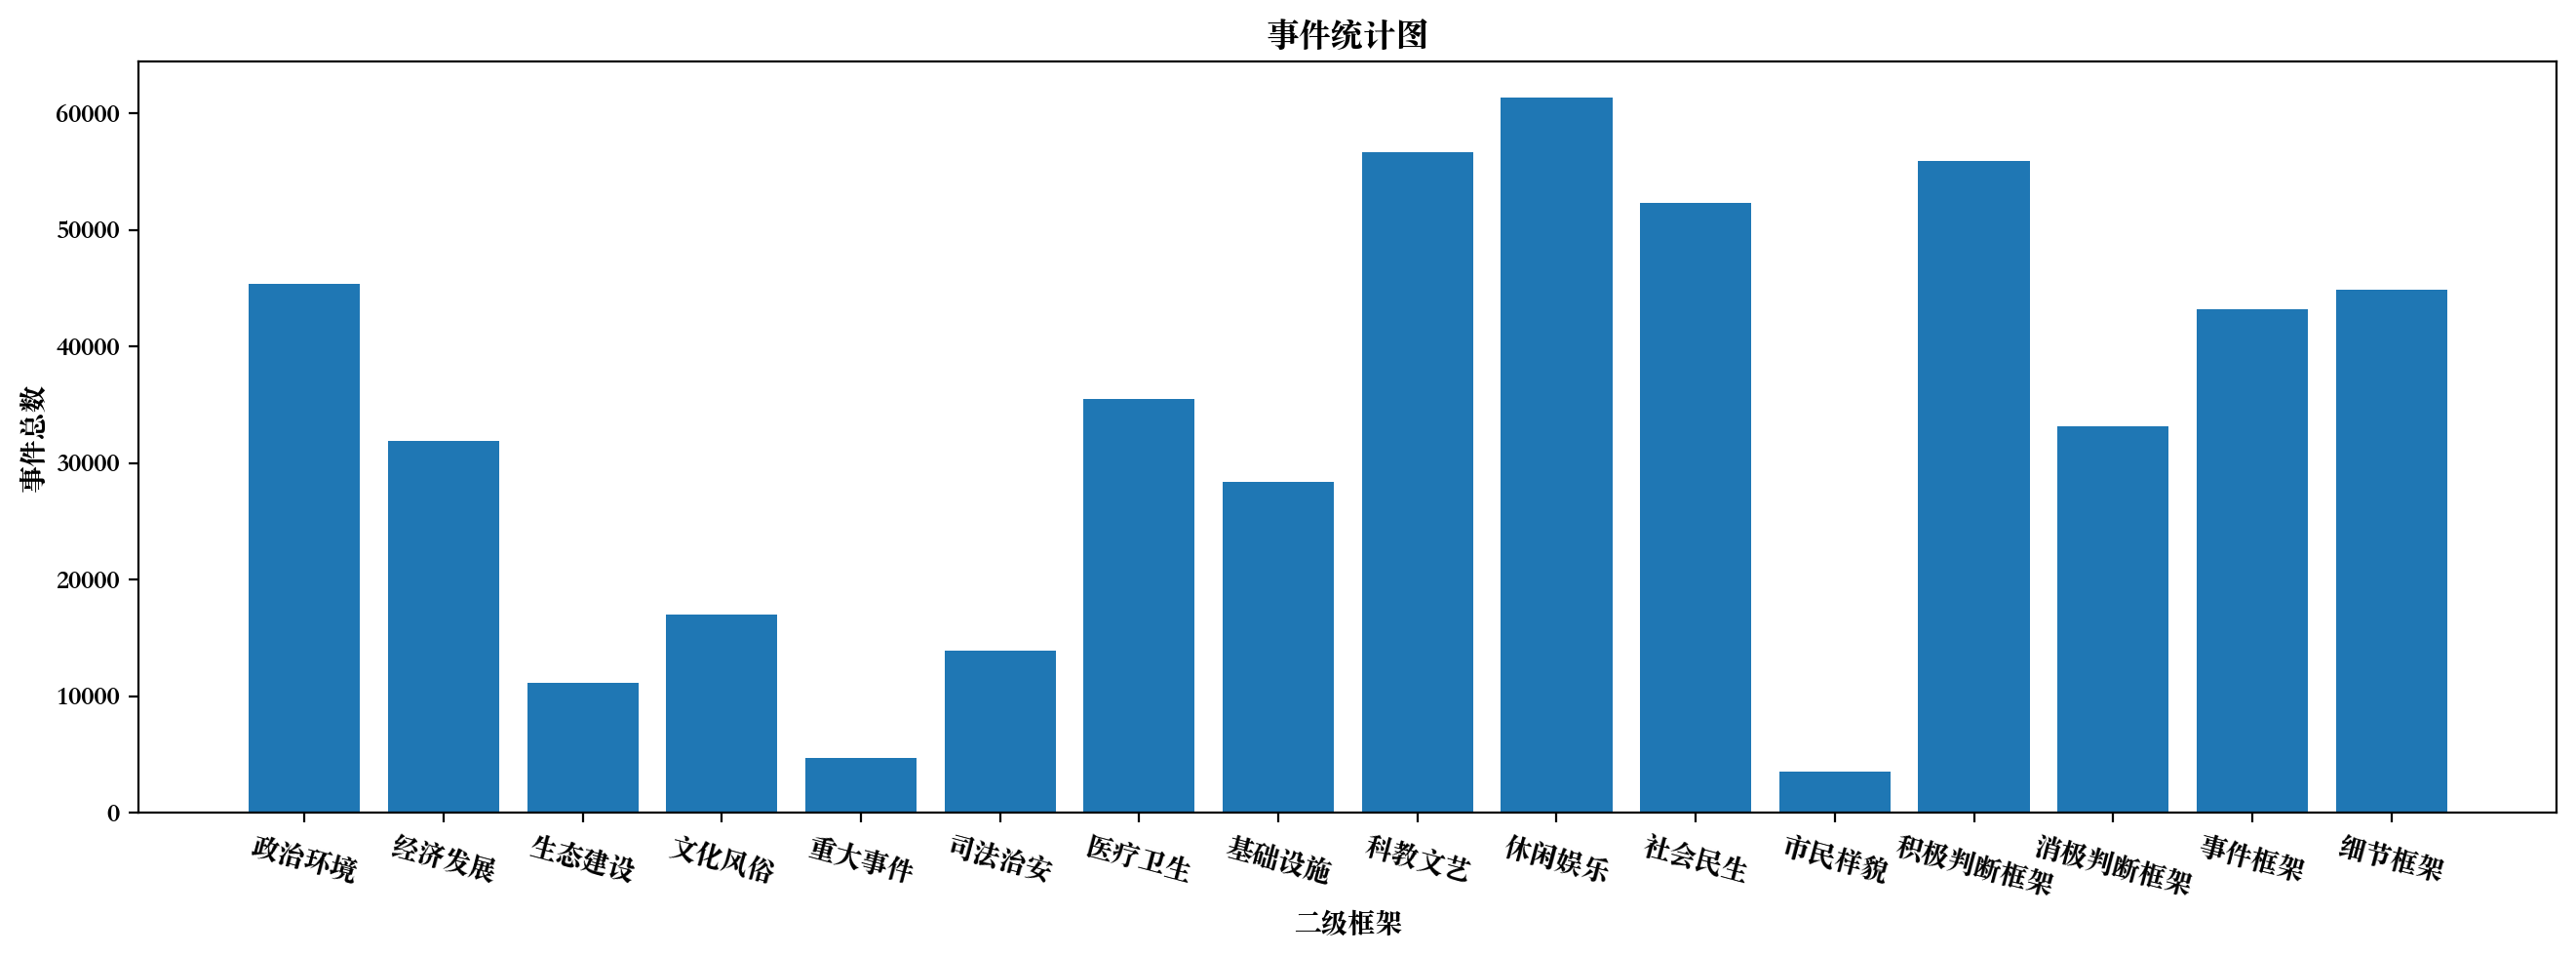

In [20]:
df_to_show = dictionary_statistics_df
fig, ax = plt.subplots(figsize=(16, 5))
labels = df_to_show.index
counts = df_to_show['总数']
ax.bar(labels, counts)
ax.set_xlabel('二级框架')
ax.set_ylabel('事件总数')
ax.set_title('事件统计图')
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

In [21]:
# 数据保存
dictionary_statistics_df.loc['合计'] = dictionary_statistics_df.agg('sum').transpose().to_numpy()
dictionary_statistics_df.to_excel('res/议题分布数量统计.xlsx')

#### 框架分布随时间变化折线图

In [22]:
period_data = pd.DataFrame()
for v in dictionary_comparison_table.columns:
    period_data[f'{v}发布数'] = get_app_group_counts(data[data[v] == 1], '发布时间月份', app_name = None, column_name=f'{v}发布数', is_fill_zero=True)

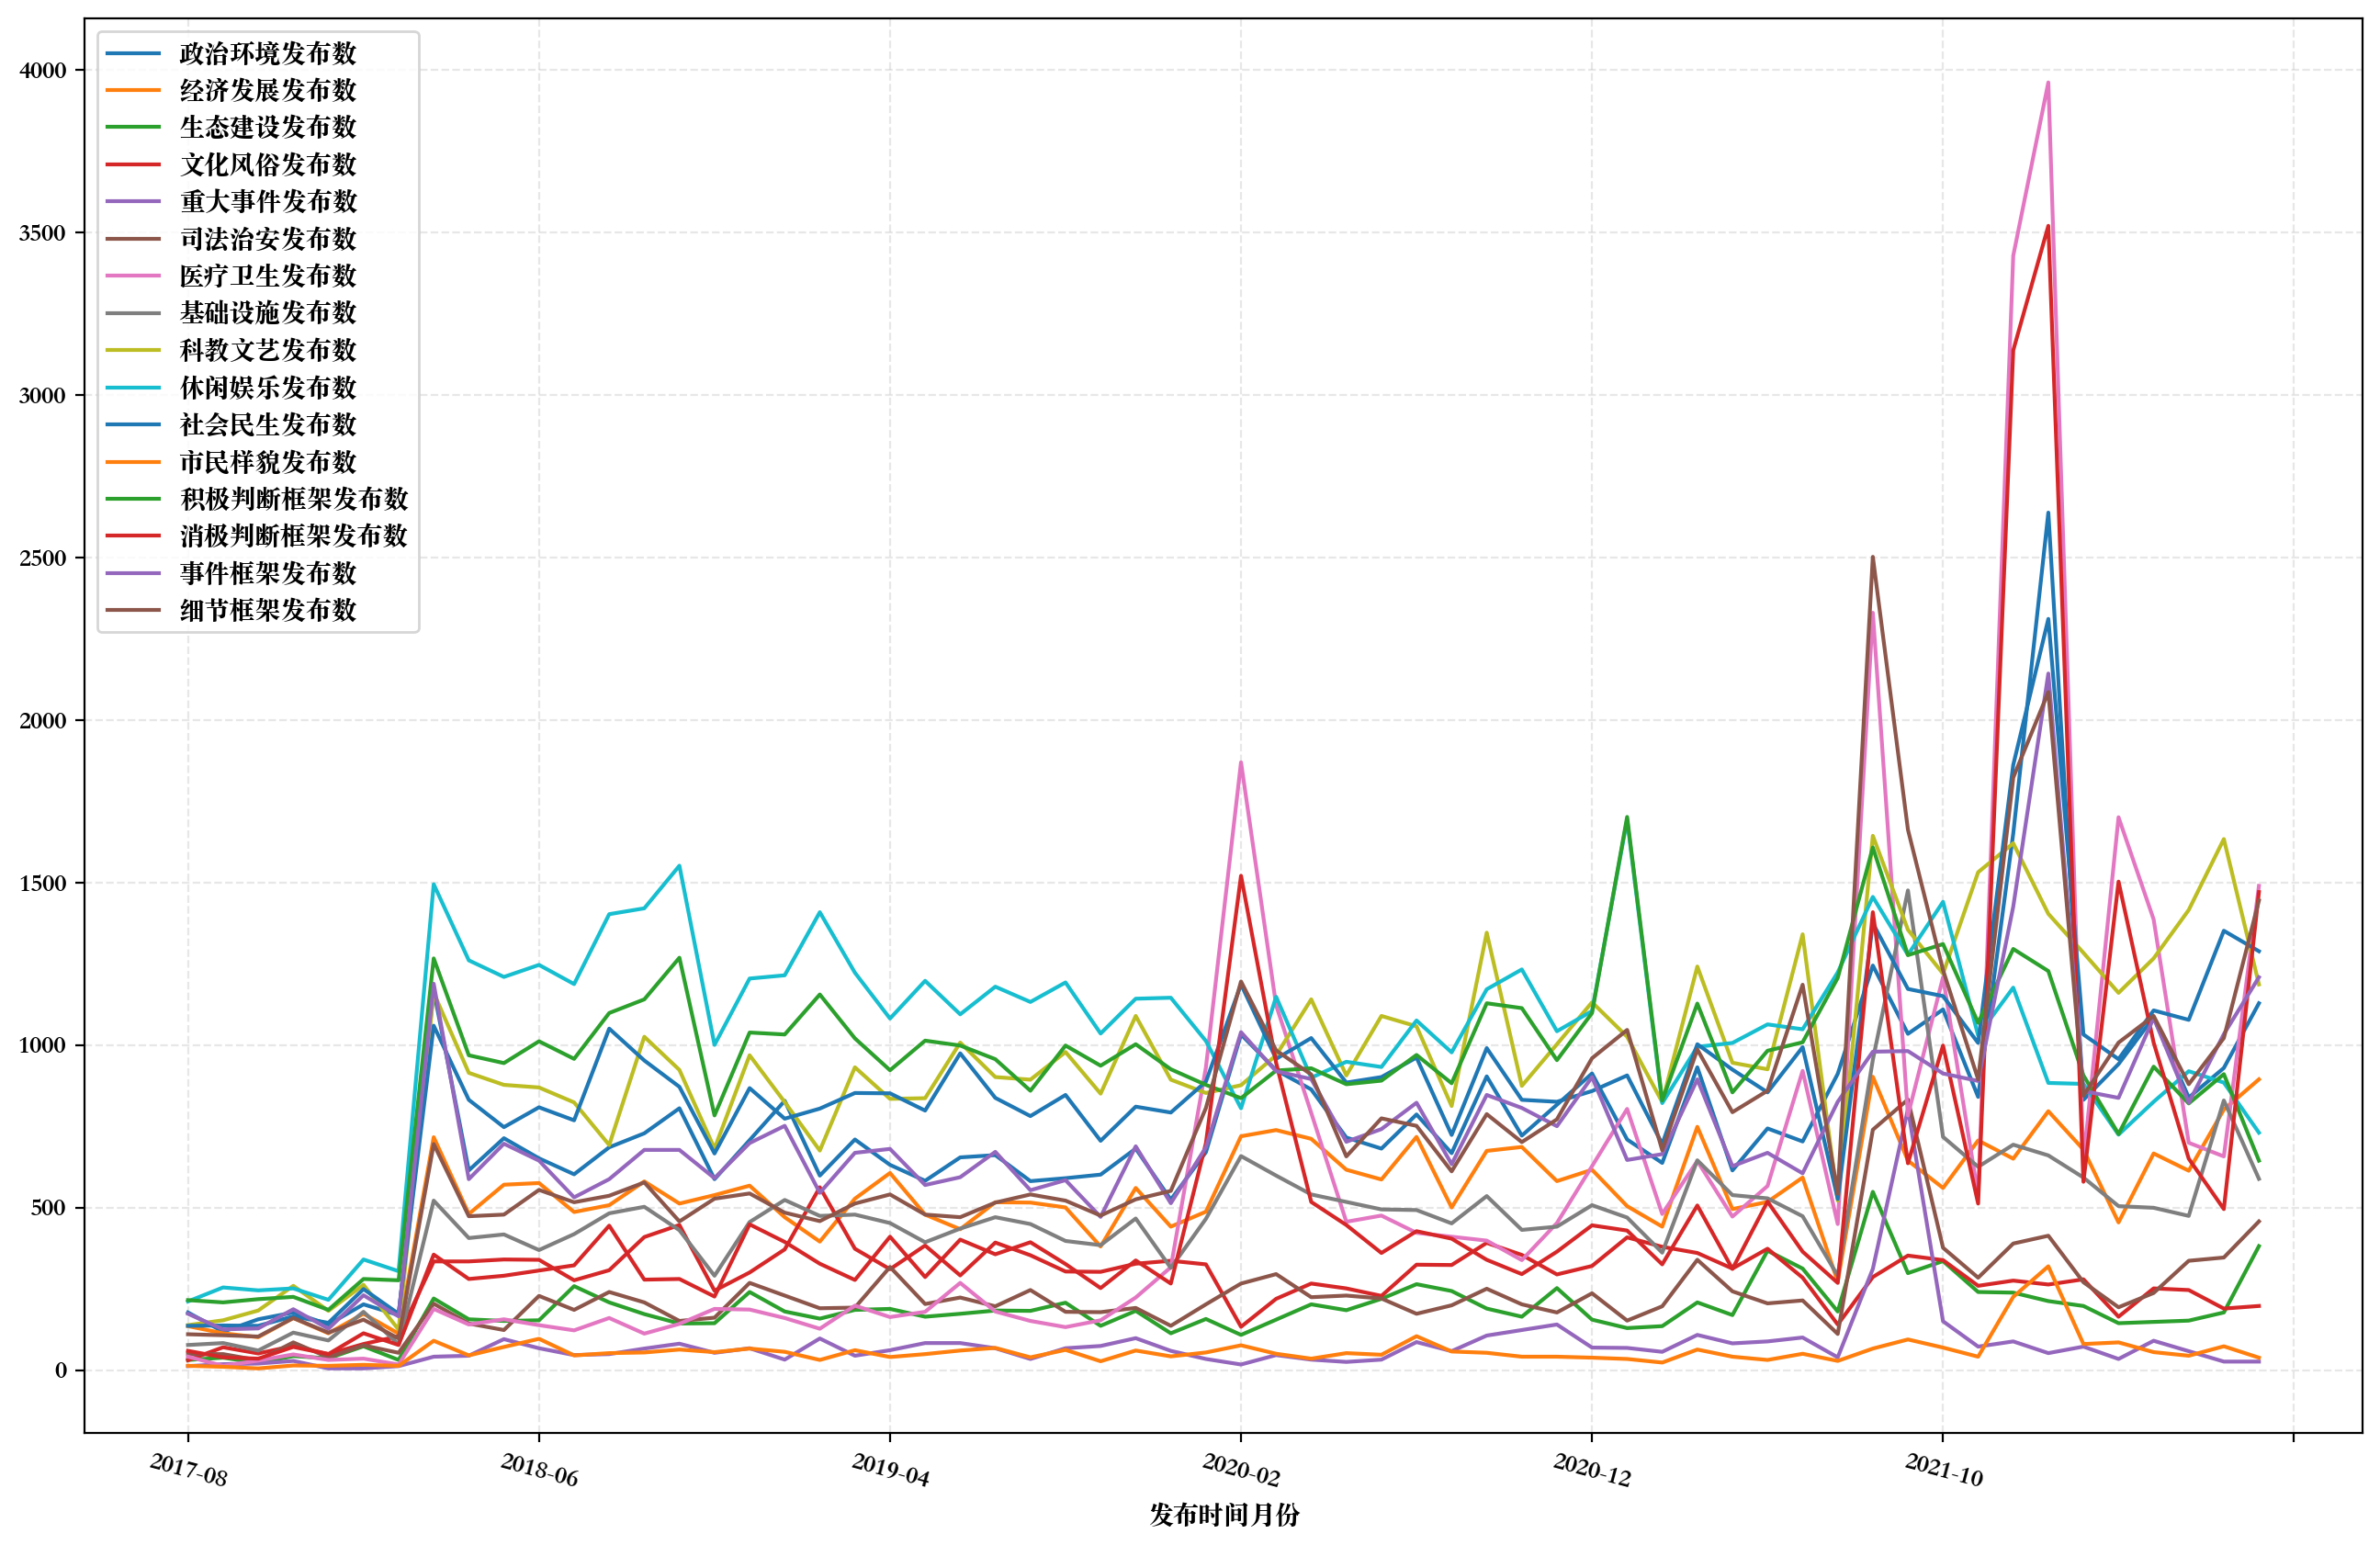

In [23]:
df_to_show = period_data
ax = df_to_show.plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

In [24]:
period_data['总发布数'] = get_app_group_counts(data, '发布时间月份', app_name = None, column_name='总发布数', is_fill_zero=True)
period_data.to_excel('res/议题发布时间分布.xlsx')

### 框架特征

#### 不同议题叙事框架选择 对应分析

In [25]:
# 把表格中的0/1编号转变为有意义的文字
def get_tag_from_frame(df, column_names):
    for name in column_names:
        df[name].replace(1,name,inplace=True)
        df[name].replace(0,'非'+name,inplace=True)
    return df

In [48]:
column_names = dictionary_comparison_table.columns.drop(('积极判断框架','消极判断框架','事件框架','细节框架','平台'))
data_correspondence_analysis = get_tag_from_frame(data[column_names].copy(), column_names)

In [50]:
data_correspondence_analysis_sample = data_correspondence_analysis.sample(40000)

In [51]:
data_correspondence_analysis_sample

,政治环境,经济发展,生态建设,文化风俗,重大事件,司法治安,医疗卫生,基础设施,科教文艺,休闲娱乐,社会民生,市民样貌,积极判断框架,消极判断框架,事件框架,细节框架,平台
128888,非政治环境,经济发展,非生态建设,非文化风俗,非重大事件,非司法治安,非医疗卫生,非基础设施,科教文艺,非休闲娱乐,社会民生,非市民样貌,非积极判断框架,消极判断框架,事件框架,非细节框架,微博
147140,非政治环境,非经济发展,非生态建设,非文化风俗,非重大事件,非司法治安,医疗卫生,非基础设施,非科教文艺,非休闲娱乐,非社会民生,非市民样貌,非积极判断框架,非消极判断框架,非事件框架,非细节框架,微博
267610,非政治环境,非经济发展,非生态建设,文化风俗,非重大事件,非司法治安,非医疗卫生,非基础设施,非科教文艺,非休闲娱乐,非社会民生,非市民样貌,非积极判断框架,非消极判断框架,非事件框架,非细节框架,微博
202821,非政治环境,非经济发展,非生态建设,非文化风俗,非重大事件,非司法治安,非医疗卫生,非基础设施,非科教文艺,休闲娱乐,非社会民生,非市民样貌,非积极判断框架,非消极判断框架,非事件框架,非细节框架,微博
122630,政治环境,非经济发展,非生态建设,非文化风俗,非重大事件,非司法治安,医疗卫生,非基础设施,非科教文艺,非休闲娱乐,非社会民生,非市民样貌,非积极判断框架,非消极判断框架,非事件框架,细节框架,微博
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270220,非政治环境,经济发展,非生态建设,非文化风俗,非重大事件,非司法治安,非医疗卫生,非基础设施,科教文艺,非休闲娱乐,非社会民生,非市民样貌,非积极判断框架,非消极判断框架,事件框架,非细节框架,微博
231975,非政治环境,非经济发展,非生态建设,非文化风俗,非重大事件,非司法治安,非医疗卫生,非基础设施,非科教文艺,非休闲娱乐,社会民生,非市民样貌,非积极判断框架,非消极判断框架,非事件框架,非细节框架,知乎
273982,非政治环境,非经济发展,非生态建设,非文化风俗,非重大事件,非司法治安,非医疗卫生,非基础设施,非科教文艺,非休闲娱乐,非社会民生,非市民样貌,非积极判断框架,非消极判断框架,非事件框架,非细节框架,微博
126530,非政治环境,非经济发展,非生态建设,非文化风俗,非重大事件,非司法治安,非医疗卫生,非基础设施,非科教文艺,非休闲娱乐,非社会民生,非市民样貌,非积极判断框架,非消极判断框架,非事件框架,非细节框架,微博


In [24]:
data_correspondence_analysis_sample.to_csv('res/框架对应分析.csv')

#### 不同平台议题、叙述框架选择 对应分析&差异分析

In [53]:
column_names = ['积极判断框架','消极判断框架','事件框架','细节框架','平台']
data_correspondence_analysis = get_tag_from_frame(data[column_names].copy(), column_names)

In [57]:
data_correspondence_analysis_douban = data_correspondence_analysis[data_correspondence_analysis['平台']=='豆瓣']
data_correspondence_analysis_zhihu = data_correspondence_analysis[data_correspondence_analysis['平台']=='知乎'].sample(15000)
data_correspondence_analysis_weibo = data_correspondence_analysis[data_correspondence_analysis['平台']=='微博'].sample(25000 - data_correspondence_analysis_douban.shape[0])
data_correspondence_analysis_sample = pd.concat([data_correspondence_analysis_douban, data_correspondence_analysis_zhihu, data_correspondence_analysis_weibo])

In [71]:
data_correspondence_analysis_douban.shape

(1170, 5)

In [72]:
data.shape

(275789, 42)

In [ ]:

data_correspondence_analysis_sample.to_csv('res/框架对应分析.csv')

### 框架效果

#### 议题框架叙述效果 差异分析

#### 叙事框架叙述效果 差异分析

### 补充分析

#### 平台-发布数时间分布统计

In [74]:
# 发布数统计（时间段）
data_time_count = pd.DataFrame()
data_time_count['总数'] = get_app_group_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_time_count[app_name] = get_app_group_counts(data, '发布时间月份', app_name, is_fill_zero=True)

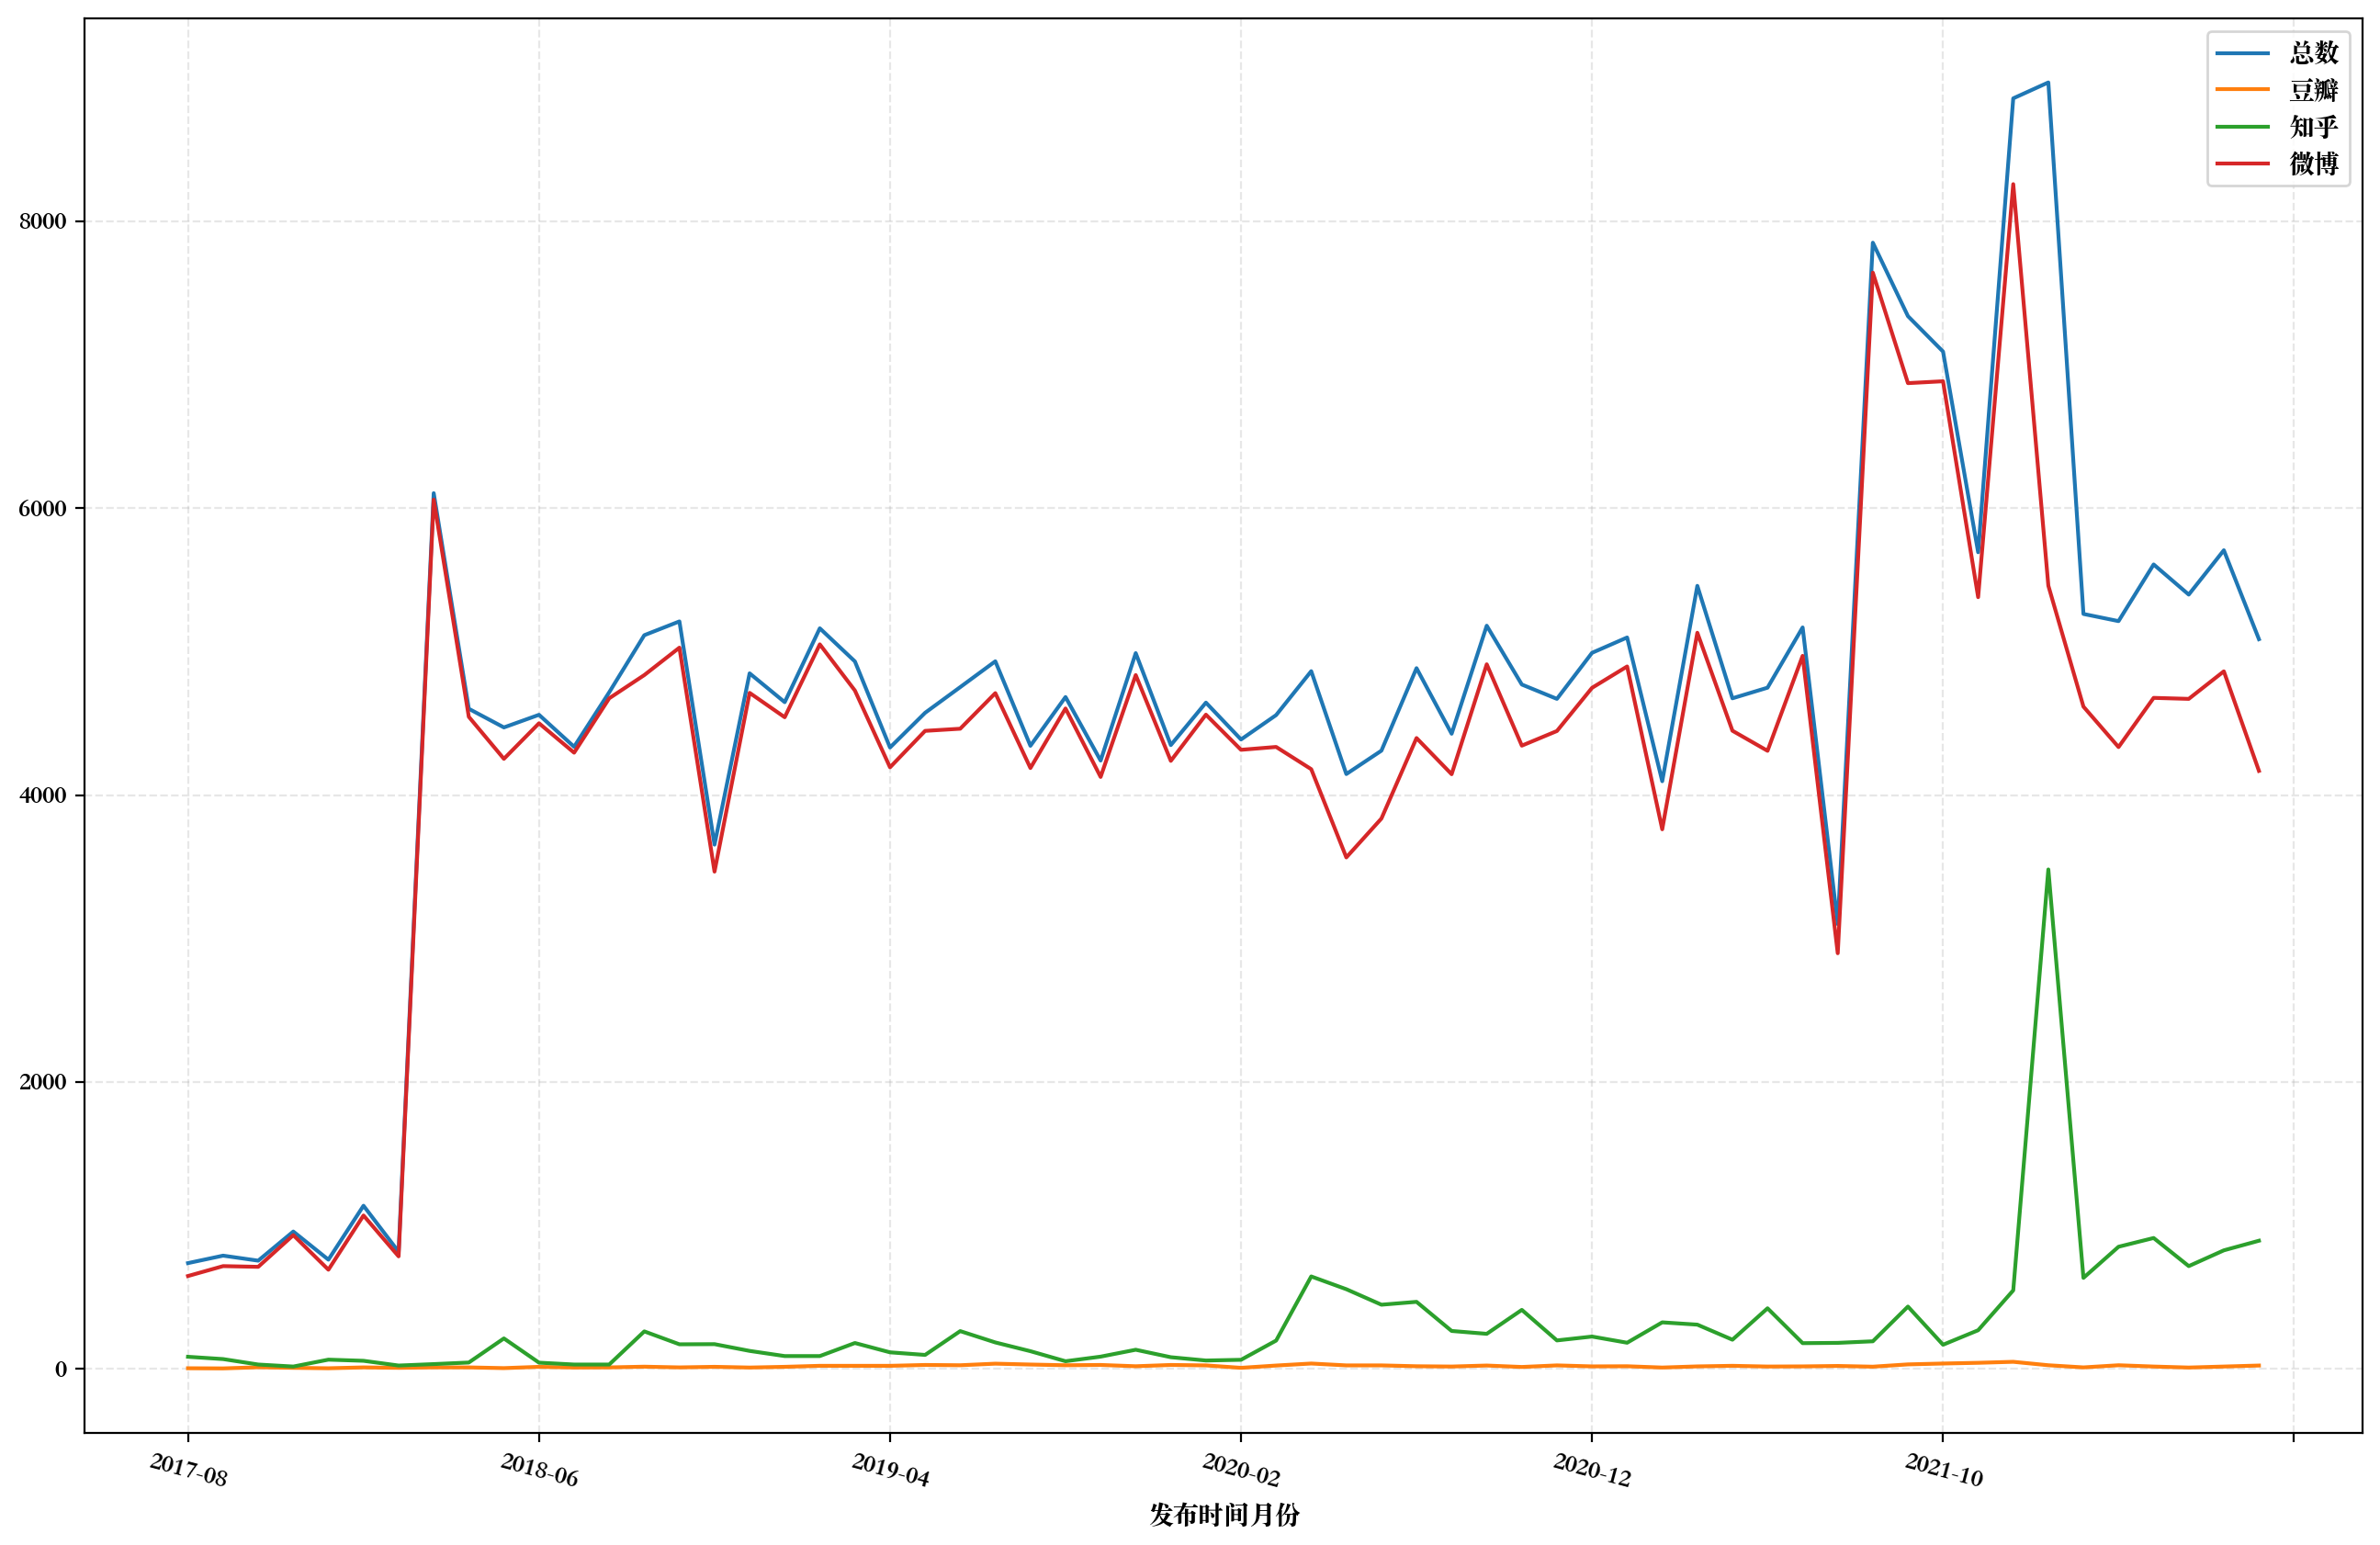

In [26]:
ax = data_time_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

In [27]:
data_time_count[data_time_count['微博']>6000]

,总数,豆瓣,知乎,微博
发布时间月份,,,,
2018-03,6105,11,34,6060
2021-08,7851,16,193,7642
2021-09,7339,32,435,6872
2021-10,7092,38,169,6885
2021-12,8857,50,548,8259


In [80]:
dt = data_time_count[(data_time_count.index>='2021-06')&(data_time_count.index<='2022-05')]

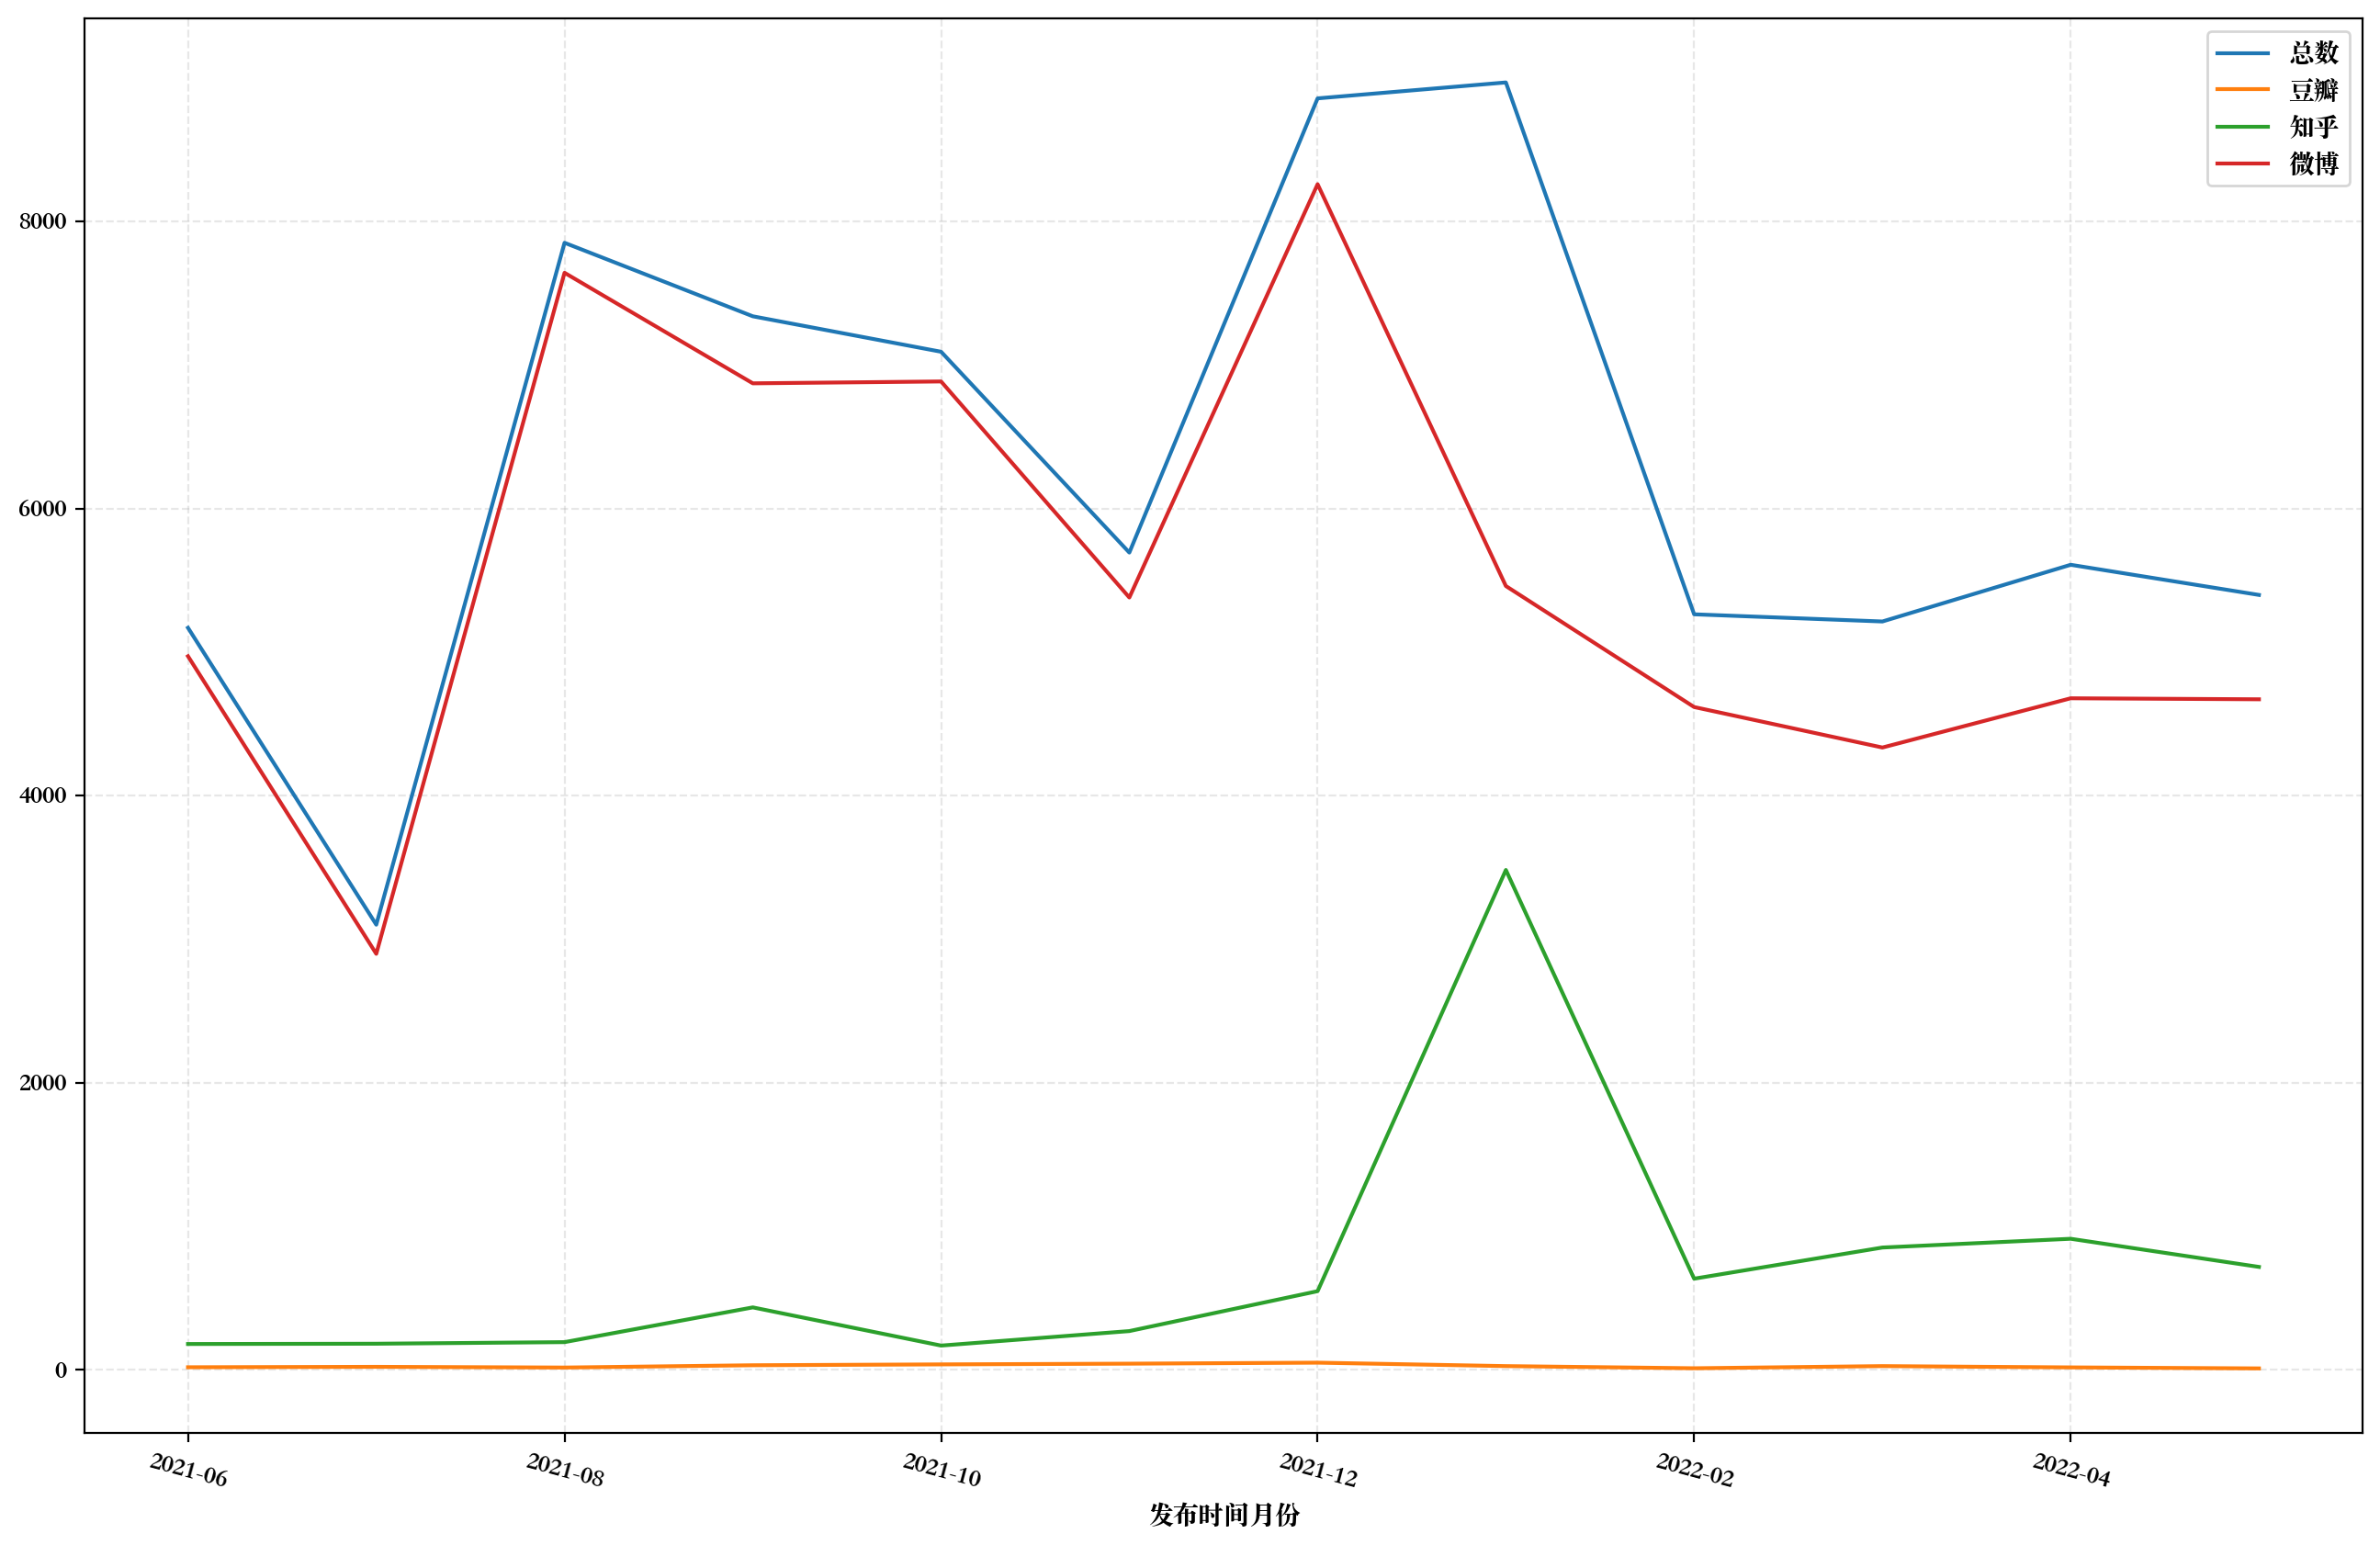

In [81]:
ax = dt.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

#### 平台-点赞数时间分布统计

In [28]:
# 点赞统计（按月）
data_vote_count = pd.DataFrame()
data_vote_count['总数'] = get_app_sum_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_vote_count[app_name] = get_app_sum_counts(data, '发布时间月份', app_name=app_name)
data_vote_count = data_vote_count.fillna(0)

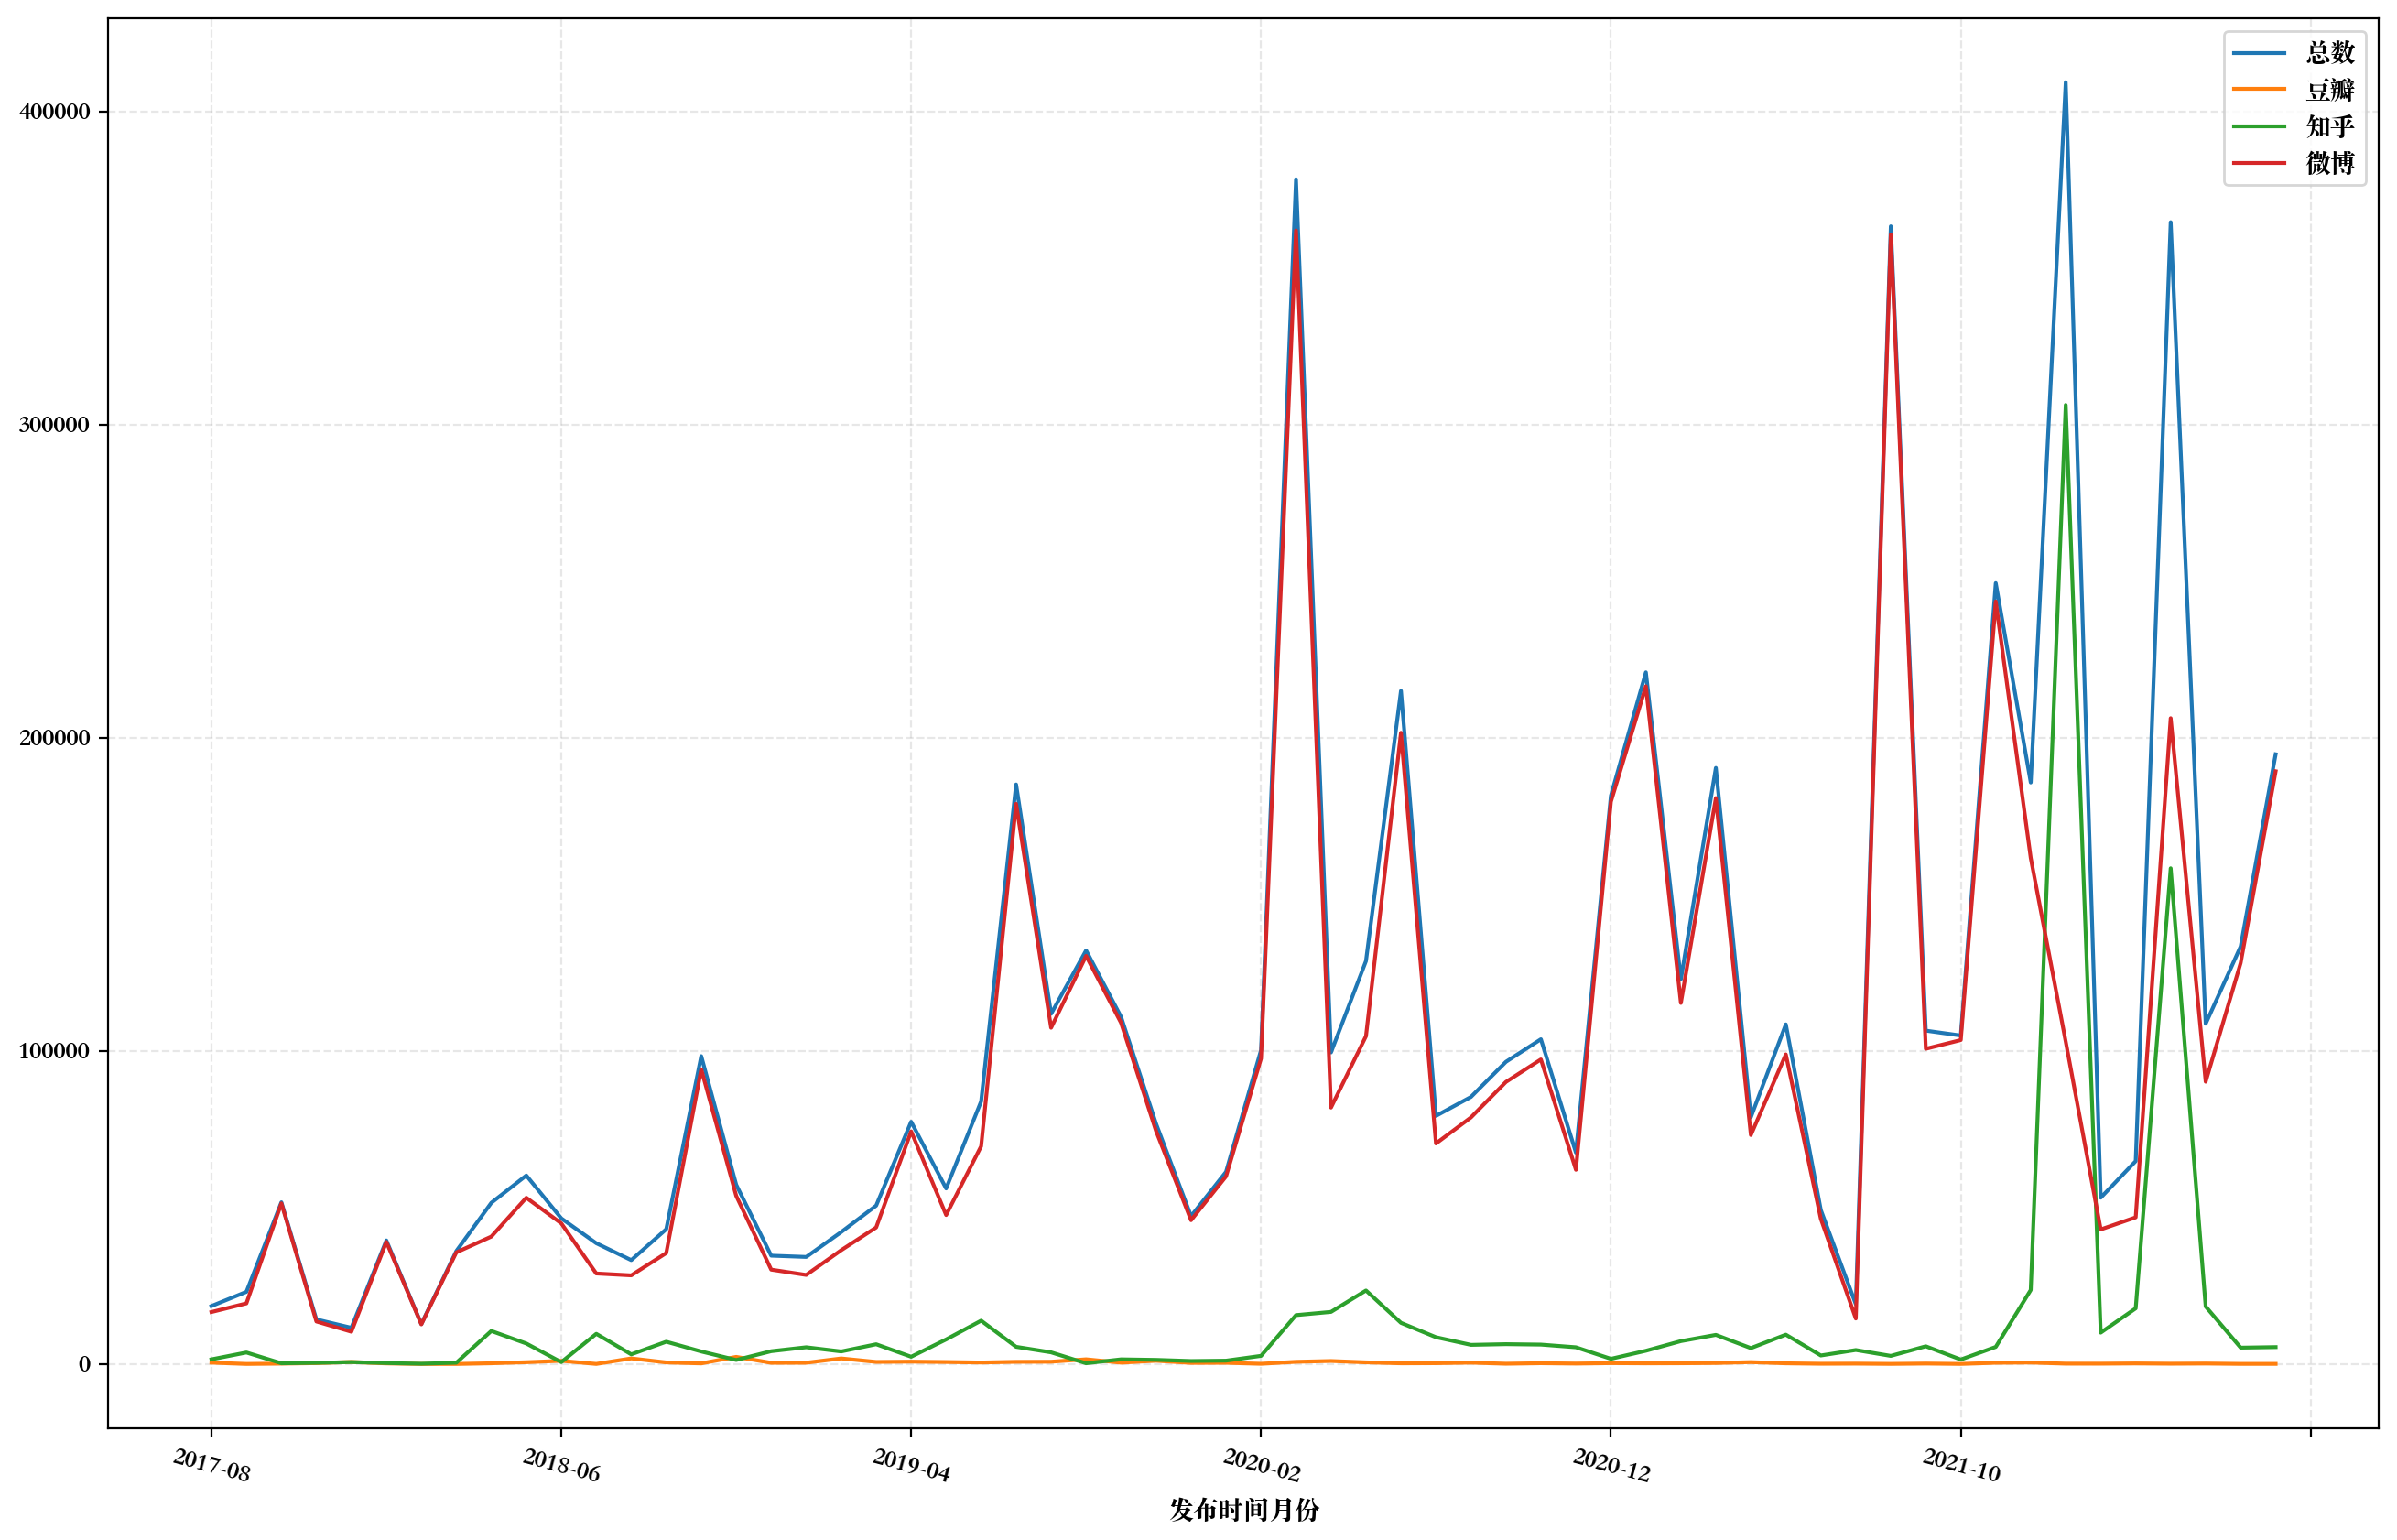

In [29]:
ax = data_vote_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
plt.xticks(rotation=-15) 
plt.show()

#### 不同平台点赞分布

In [13]:
def auto_label(rect_group, ax):
    """Attach a text label above each bar in *rect_group*, displaying its height."""
    for rect in rect_group:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

In [14]:
app_data = data[['点赞数', '平台']]
weibo = app_data[app_data['平台'] == '微博'].sample(1170)
zhihu = app_data[app_data['平台'] == '知乎'].sample(1170)
douban = app_data[app_data['平台'] == '豆瓣']
app_data = pd.concat([zhihu, weibo, douban])

In [15]:
# 点赞数区间分割
bins=[0,2,5,10,20,30,40,50,60,70,80,90,100,120,150,200,500,1000,5000,10000,100000]
segments=pd.cut(data['点赞数'],bins,right=False)
seg_weibo = pd.cut(weibo['点赞数'],bins,right=False)
seg_zhihu = pd.cut(zhihu['点赞数'],bins,right=False)
seg_douban = pd.cut(douban['点赞数'],bins,right=False)

In [16]:
# 点赞统计
vote_counts=pd.value_counts(segments,sort=False)
vote_counts_weibo=pd.value_counts(seg_weibo,sort=False)
vote_counts_zhihu=pd.value_counts(seg_zhihu,sort=False)
vote_counts_douban=pd.value_counts(seg_douban,sort=False)

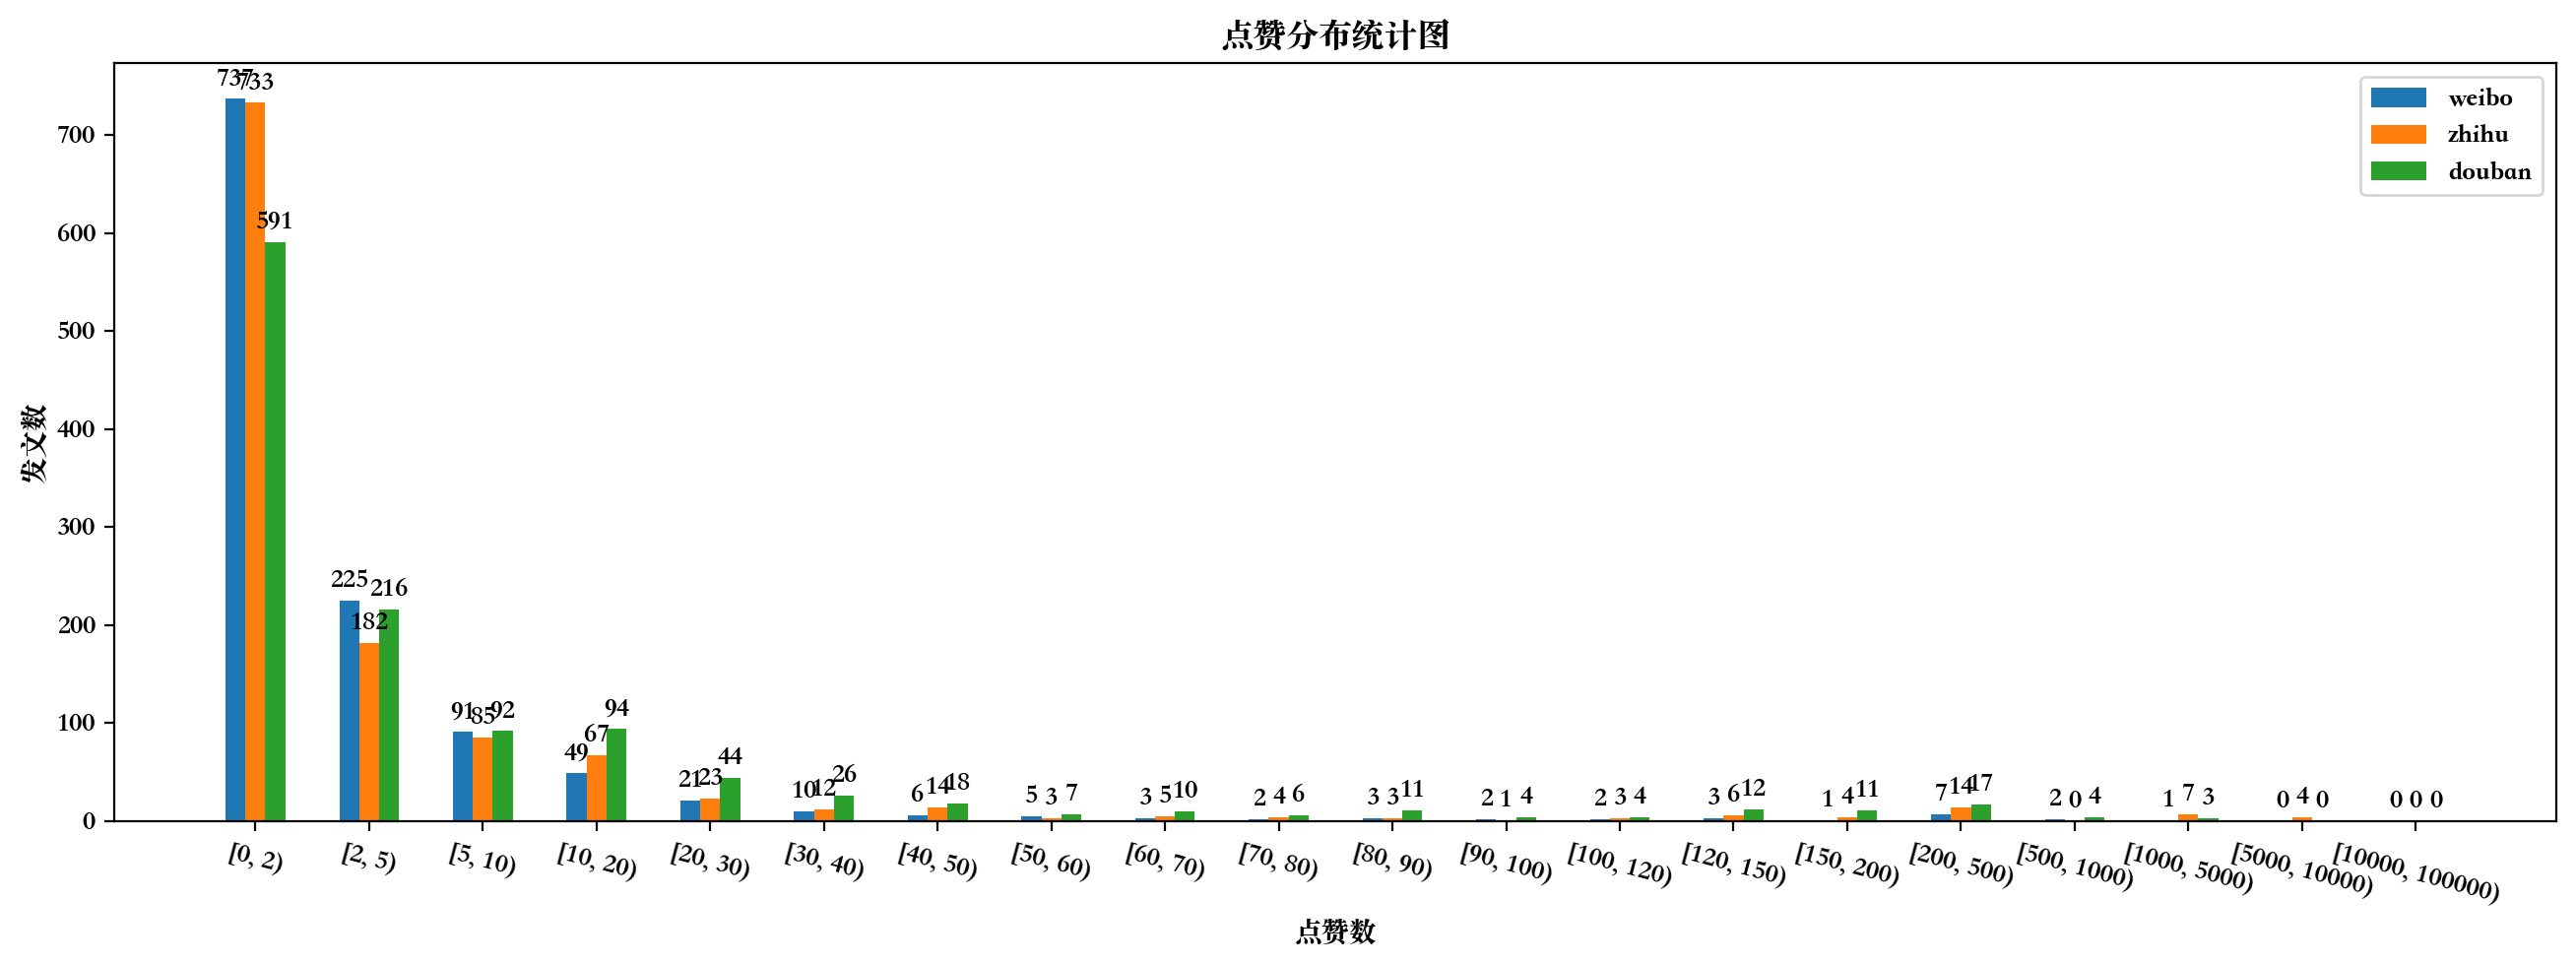

In [19]:
fig, ax = plt.subplots(figsize=(16, 5))
x = np.arange(len(vote_counts.index))
width = 0.35
weibo_bar = ax.bar(x - width/2, vote_counts_weibo, width/2, label='weibo')
zhihu_bar = ax.bar(x, vote_counts_zhihu, width/2, label='zhihu')
douban_bar = ax.bar(x + width/2, vote_counts_douban, width/2, label='douban')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(vote_counts.index.astype(str))
ax.set_xlabel('点赞数')
ax.set_ylabel('发文数')
ax.set_title('点赞分布统计图')
auto_label(douban_bar, ax)
auto_label(zhihu_bar, ax)
auto_label(weibo_bar, ax)
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

## 数据保存

In [ ]:
# data.to_pickle(get_new_path(DataFilePath,'时间分割'))